### #  '240,010,403' : 즉석식품

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import scipy.stats as stats
import seaborn as sns

In [2]:
import os
os.getcwd()

'/Users/we/Downloads/업무/buy it again_분석 '

./chunk/

---

## # 즉석식품 데이터 사용 : '240,010,403'

In [3]:
retort_train = pd.read_excel('retort_train.xlsx')
retort_test = pd.read_excel('retort_test.xlsx')

In [4]:
retort_train.head(3)

,Unnamed: 0,biz_dt,m_id,order_price,prod_no,old_admin_category_id,serv_cd
8,8,2018-01-01 00:00:02,"23,119,672","9,900","3,095,067","240,010,403",1
185,185,2018-01-01 00:00:46,"13,719,818","63,260","3,043,235","240,010,403",1
186,186,2018-01-01 00:00:46,"6,673,847","41,040","1,890,228","240,010,403",1


In [5]:
retort_train.tail(3)

,Unnamed: 0,biz_dt,m_id,order_price,prod_no,old_admin_category_id,serv_cd
9110140,99110140,2018-07-31 23:59:42,"20,144,042","19,800","3,875,978","240,010,403",1
9110255,99110255,2018-07-31 23:59:51,"3,447,745","32,500","3,675,138","240,010,403",1
9110269,99110269,2018-07-31 23:59:52,"2,918,378","17,900","3,877,762","240,010,403",1


In [6]:
retort_train.m_id.nunique()   # 약 52만명()

526724

In [7]:
train_mid = retort_train.m_id.unique()

In [8]:
# train_mid[0] 의 구매내역

retort_train[retort_train.m_id == train_mid[0]]

,Unnamed: 0,biz_dt,m_id,order_price,prod_no,old_admin_category_id,serv_cd
8,8,2018-01-01 00:00:02,"23,119,672","9,900","3,095,067","240,010,403",1
7600948,87600948,2018-07-08 12:02:38,"23,119,672","9,777","3,807,057","240,010,403",1


---

### #  time interval 불러오기

In [9]:
tt = pd.read_csv('retort_train_time_interval.csv', header=None)

In [10]:
tt.head()

,0,1,2,3,4,5,6
0,52,2018-04-18T23:04:04.000+09:00,"1,010,299","3,000","3,569,399","240,010,403",1
1,1,2018-04-19T00:22:10.000+09:00,"1,010,299","5,500","3,574,914","240,010,403",1
2,36,2018-02-08T12:15:57.000+09:00,"1,011,295","13,900","2,823,873","240,010,403",1
3,13,2018-02-21T12:05:27.000+09:00,"1,011,295","13,900","2,823,873","240,010,403",1
4,102,2018-06-03T16:33:42.000+09:00,"1,011,295","15,900","3,714,756","240,010,403",1


In [11]:
tt.columns = ['time','biz_dt', 'm_id', 'order_price', 'prod_no', 'old_admin_category_id', 'serv_cd']

In [12]:
tt = tt.iloc[:,:1]

In [13]:
tt.head()

,time
0,52
1,1
2,36
3,13
4,102


---

# # t (interval) 분석해보자

In [14]:
tt.shape

(401967, 1)

In [15]:
tt = tt.dropna()  # t값 순수하게 얻은거야 - 중원대리님이 뽑아준거에서는 아마 없을거야!

In [16]:
# nan값 제거하고 얻은 shape : 13만 6천개 (전체 - distinct user의 수 (1개 제품 구매자 포함) )

tt.shape

(401967, 1)

In [17]:
tt.head()

,time
0,52
1,1
2,36
3,13
4,102


In [18]:
#음 중원대리님이 뽑아주신 데이터에서는 0이 없어!

tt.time.value_counts()

1      14561
2      10792
3       9557
7       9515
6       9013
4       8946
5       8683
8       8376
14      8274
13      7707
10      7547
9       7514
12      7130
15      7119
11      6960
21      6908
16      6634
20      6603
17      6202
18      6152
22      6149
19      6005
28      5933
23      5425
27      5379
24      5366
26      5325
29      5287
25      5214
35      4837
       ...  
183      164
178      156
186      146
187      144
188      140
185      126
184      122
189      116
191      109
196      109
194      101
190       98
195       95
192       85
193       81
198       63
197       62
199       57
204       55
200       51
203       47
201       43
202       43
205       39
208       30
206       29
207       24
209       24
210       11
211        8
Name: time, Length: 211, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1f238748>]],
      dtype=object)

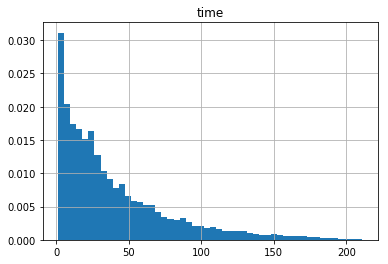

In [19]:
tt.hist(bins=50, density = True)

---

### # test id 데이터에서 뽑아오자

In [20]:
# Test_id : 테스트 데이터에서, unique한 id 1000개

test_id = retort_test.m_id.unique()[:1000]

In [21]:
len(test_id)

1000

---

In [22]:
# test_id 1000개중에서, train기록 가지고있는 애들만 활용해본다!

tf = []
for i in range(len(test_id)):
    tf.append( bool(retort_train[retort_train.m_id == test_id[i]].shape[0]) 
              & bool(retort_test[retort_test.m_id == test_id[i]].shape[0]) == True) #train, test 둘다 있는 아이디를 밝혀주는 index만들어주는거야.

In [25]:
tf

[True,
 True,
 False,
 False,
 True,
 True,
 False,
 True,
 False,
 True,
 False,
 False,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 False,
 False,
 True,
 False,
 True,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 False,
 True,
 False,
 False,
 True,
 True,
 True,
 False,
 False,
 False,
 True,
 False,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 False,
 False,
 True,
 True,
 True,
 False,
 False,
 False,
 True,
 True,
 True,
 True,
 False,
 True,
 False,
 True,
 False,
 True,
 False,
 True,
 False,
 True,
 True,
 False,
 False,
 True,
 False,
 True,
 True,
 True,
 False,
 False,
 False,
 True,
 True,
 False,
 False,
 True,
 False,
 False,
 False,
 True,
 False,
 True,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 True,
 False,
 True,
 True,
 True,
 False,
 True,
 True,
 False,
 False,
 True,
 True,
 False,
 True,
 True,
 False,
 True,
 Tr

In [23]:
len(test_id)

1000

In [24]:
len(test_id[tf]) # train data를 가지고있는 애들(67% 정도네!)

646

In [25]:
test_id_ = test_id[tf]

---

# ----------------------------------------------------------------------------------------

---

## * lambda라는 개념을 다시 잡기.
poisson(lambda) : 이때의 lambda는 단위시간 당 사건의 평균적인 발생 횟수. - 이를 추정하기 위해, 단위 시간 당 사건의 발생횟수의 분포를 본다.


## # 1/time 을 감마 피팅 하자.
: time들의 분포를 알고있다 -> 단위 시간 당, 사건의 발생횟수를 맞춰줄 수 있다. 예를 들어, user들로부터 t=(3일,4일,5일,6일)이라는 time-interval을 얻게 되었다고 하자.

 이때, 단위 시간 당 사건의 발생 횟수 X=(1/3, 1/4, 1/5, 1/6)이고, 이 분포를 이용해 poisson(lambda)를 추정하는 것이다.

In [26]:
tt.mean()   # 평균 39일?

time    39.689395
dtype: float64

In [27]:
# tt의 inverse를 사용할 것이다.

tt_inver = 1/tt

In [28]:
tt_inver.head()

,time
0,0.019231
1,1.000000
2,0.027778
3,0.076923
4,0.009804


In [29]:
1/tt_inver.mean()

time    9.41034
dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a17f92eb8>]],
      dtype=object)

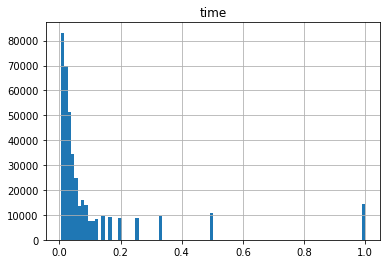

In [30]:
tt_inver.hist(bins=90)

In [31]:
# unit time - 일주일

tt_inver7 = tt_inver*7

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a196929b0>]],
      dtype=object)

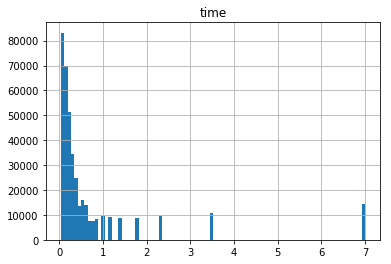

In [32]:
tt_inver7.hist(bins=90)

In [33]:
tt_inver7.mean()

time    0.743863
dtype: float64

In [34]:
1/tt_inver7.mean()

time    1.344334
dtype: float64

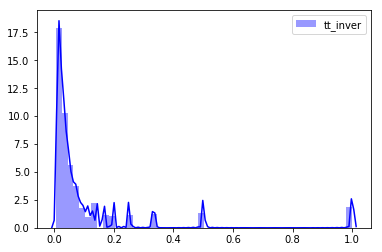

In [46]:
# tt_inver 의 분포를 살펴보는거야

plt.figure()
sns.distplot( tt_inver, color = 'blue', label='tt_inver')
plt.legend()
#plt.xlim(-3,55)

plt.show()
plt.close()

---

### # (1) gamma.fit으로 parameters 추정해볼게.

In [35]:
alpha, _ , scale = stats.gamma.fit(tt_inver, floc=0) 

In [36]:
alpha, scale

(0.6882067506495457, 0.15441011647401656)

In [37]:
1/scale    #Beta

6.476259605492076

---

### # 1주일 단위로

In [38]:
# 1주윌 단위로 계산 -> 하루 단위에서 7배 해주면 되지.

tt_inver7 = tt_inver*7

In [39]:
tt_inver7.time.value_counts()

7.000000    14561
3.500000    10792
2.333333     9557
1.000000     9515
1.166667     9013
1.750000     8946
1.400000     8683
0.875000     8376
0.500000     8274
0.538462     7707
0.700000     7547
0.777778     7514
0.583333     7130
0.466667     7119
0.636364     6960
0.333333     6908
0.437500     6634
0.350000     6603
0.411765     6202
0.388889     6152
0.318182     6149
0.368421     6005
0.250000     5933
0.304348     5425
0.259259     5379
0.291667     5366
0.269231     5325
0.241379     5287
0.280000     5214
0.200000     4837
            ...  
0.038251      164
0.039326      156
0.037634      146
0.037433      144
0.037234      140
0.037838      126
0.038043      122
0.037037      116
0.035714      109
0.036649      109
0.036082      101
0.036842       98
0.035897       95
0.036458       85
0.036269       81
0.035354       63
0.035533       62
0.035176       57
0.034314       55
0.035000       51
0.034483       47
0.034653       43
0.034826       43
0.034146       39
0.033654  

In [40]:
print(tt_inver.shape[0], sum(tt_inver7.time == 7.0)  )  # 40만개중에, 약 14,561 개가 time-interval=1이야

# tt_invr7 == 7 이라는 의미는, 1주일 단위에 구매가 '7번'일어나는 사람들의 frequency를 보여주는거야!(사실은, 하루에 한번 산 사람들!) 

401967 14561


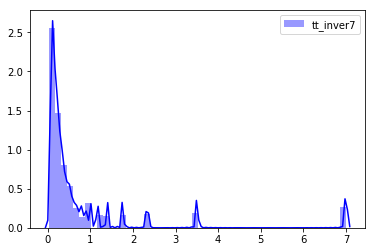

In [41]:
plt.figure()
sns.distplot( tt_inver7, color = 'blue', label='tt_inver7')
plt.legend()
#plt.xlim(-3,55)

plt.show()
plt.close()

In [42]:
alpha_, _ , scale_ = stats.gamma.fit(tt_inver7, floc=0) 

In [43]:
alpha_, scale_

(0.6882067506495457, 1.0808708153181152)

In [44]:
tt_inver7.mean()

time    0.743863
dtype: float64

In [45]:
alpha_*scale_   # tt_inver7.mean() == alpha_*scale_

0.7438625916820053

In [46]:
import scipy.stats as stats

In [47]:
y = stats.gamma.rvs(a = alpha_, loc=0, scale=scale_, size=1000, random_state=None)

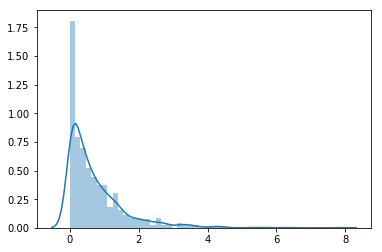

In [48]:
plt.figure()
sns.distplot(y, bins=50)


---

---

## # 일주일

In [77]:
len(test_id_)

646

In [51]:
# 설정한 current에서 한달 정도의 기간을 만들어준다.

current_l = pd.date_range('2018-08-01', periods=30).tolist()

In [52]:
# 함수로 출력되는게 많게했어! & unit time을 1주일로 변경.

def func_lamb(train, test, test_id, current, alpha, beta, tmean):
    t_ = (current.date() - train[train.m_id == test_id].iloc[-1].biz_dt.date()).days/7  # 구매이력이 없는사람은?(고려해야해) - 지금은 있는 사람만.
    t_purch = (train[train.m_id == test_id].iloc[-1].biz_dt.date() - train[train.m_id == test_id].iloc[0].biz_dt.date()).days/7
    k = train.biz_dt.dt.date[train.m_id == test_id].nunique() # train 구매 day-time이력
    if (k <= 1) or (train.biz_dt[train.m_id == test_id].diff().mean().days/7 == 0) :# if구매이력이 1회 이하 or user_mean=0
        tmean_u = tmean # tmean : 모든 user들의 상품에대한 평균 t(구매이력이 한번밖에 없으니, user의 고유 평균 t값 대입할 수 없다.)
    else:
        y = train.biz_dt[train.m_id == test_id].dt.date.diff().dt.days
        y = y.replace(0, np.NaN)
        tmean_u = y.mean()/7
    
    lamb = ((k+alpha)/(t_purch + 2*abs(tmean_u-t_) + beta))
    lamb_0 = ((k+alpha)/(t_purch + beta))
    return lamb, lamb_0, t_, t_purch, tmean_u, k

In [53]:
c = {}

for j in range(len(test_id_[:30])):   # "test_id_" 를 이용해, 결과 살펴보겠다!
    c[j] = []
    for i in range(30):     ## 8월 한달간에 대해서!
        lamb, lamb_0, t_, t_purch, tmean_u, k = func_lamb(train = retort_train, test = retort_test, test_id=test_id_[j], 
                  alpha = alpha_ , beta=1/scale_ , tmean = tt.mean().item()/7 , current=current_l[i])
        
        pred = (1-stats.poisson.pmf(mu = lamb, k=0))
        scal = (1-stats.poisson.pmf(mu = lamb, k=0))/(1-stats.poisson.pmf(mu = lamb_0, k=0))
        
        if i == 0:
            print('user:[{}]'.format(j),'last order:', retort_train.biz_dt[retort_train.m_id == test_id_[j]][-1:], '\n')
        print('current:',current_l[i], ', current-last_order:', t_ , ', tmean_u:',tmean_u)  
        print('scal_pred:', scal,', pred:',pred, ', t_purch:', t_purch, ', k:',k ,'\n')
        c[j].append( scal )
    print('------------------------------------------------------------------------')
    print('\n')

user:[0] last order: 5483751   2018-07-04 19:52:16
Name: biz_dt, dtype: datetime64[ns] 

current: 2018-08-01 00:00:00 , current-last_order: 4.0 , tmean_u: 8.095238095238095
scal_pred: 0.7717145745997254 , pred: 0.13095442742455654 , t_purch: 24.285714285714285 , k: 4 

current: 2018-08-02 00:00:00 , current-last_order: 4.142857142857143 , tmean_u: 8.095238095238095
scal_pred: 0.7779126548109314 , pred: 0.13200619717454598 , t_purch: 24.285714285714285 , k: 4 

current: 2018-08-03 00:00:00 , current-last_order: 4.285714285714286 , tmean_u: 8.095238095238095
scal_pred: 0.7842109188234612 , pred: 0.1330749673969528 , t_purch: 24.285714285714285 , k: 4 

current: 2018-08-04 00:00:00 , current-last_order: 4.428571428571429 , tmean_u: 8.095238095238095
scal_pred: 0.7906118105382929 , pred: 0.13416115280424168 , t_purch: 24.285714285714285 , k: 4 

current: 2018-08-05 00:00:00 , current-last_order: 4.571428571428571 , tmean_u: 8.095238095238095
scal_pred: 0.7971178538205986 , pred: 0.13526518

current: 2018-08-13 00:00:00 , current-last_order: 1.8571428571428572 , tmean_u: 9.761904761904761
scal_pred: 0.6738159820840435 , pred: 0.09685514211103496 , t_purch: 29.285714285714285 , k: 4 

current: 2018-08-14 00:00:00 , current-last_order: 2.0 , tmean_u: 9.761904761904761
scal_pred: 0.6778134053095777 , pred: 0.09742973666634602 , t_purch: 29.285714285714285 , k: 4 

current: 2018-08-15 00:00:00 , current-last_order: 2.142857142857143 , tmean_u: 9.761904761904761
scal_pred: 0.6818584966193783 , pred: 0.09801118309100798 , t_purch: 29.285714285714285 , k: 4 

current: 2018-08-16 00:00:00 , current-last_order: 2.2857142857142856 , tmean_u: 9.761904761904761
scal_pred: 0.6859521129141414 , pred: 0.09859960455698602 , t_purch: 29.285714285714285 , k: 4 

current: 2018-08-17 00:00:00 , current-last_order: 2.4285714285714284 , tmean_u: 9.761904761904761
scal_pred: 0.6900951317349738 , pred: 0.09919512720312351 , t_purch: 29.285714285714285 , k: 4 

current: 2018-08-18 00:00:00 , curre

current: 2018-08-27 00:00:00 , current-last_order: 14.0 , tmean_u: 5.669913557225202
scal_pred: 0.10913598725624905 , pred: 0.09153664926606153 , t_purch: 0.0 , k: 1 

current: 2018-08-28 00:00:00 , current-last_order: 14.142857142857142 , tmean_u: 5.669913557225202
scal_pred: 0.10747230753962832 , pred: 0.09014125558758768 , t_purch: 0.0 , k: 1 

current: 2018-08-29 00:00:00 , current-last_order: 14.285714285714286 , tmean_u: 5.669913557225202
scal_pred: 0.10585855100732029 , pred: 0.08878773444930488 , t_purch: 0.0 , k: 1 

current: 2018-08-30 00:00:00 , current-last_order: 14.428571428571429 , tmean_u: 5.669913557225202
scal_pred: 0.1042925054627895 , pred: 0.08747423039488322 , t_purch: 0.0 , k: 1 

------------------------------------------------------------------------


user:[3] last order: 9801471   2018-06-01 10:05:17
Name: biz_dt, dtype: datetime64[ns] 

current: 2018-08-01 00:00:00 , current-last_order: 8.714285714285714 , tmean_u: 5.669913557225202
scal_pred: 0.255046526109

current: 2018-08-11 00:00:00 , current-last_order: 5.857142857142857 , tmean_u: 12.928571428571429
scal_pred: 0.6698776266354599 , pred: 0.08617913936057442 , t_purch: 25.857142857142858 , k: 3 

current: 2018-08-12 00:00:00 , current-last_order: 6.0 , tmean_u: 12.928571428571429
scal_pred: 0.6743767245036375 , pred: 0.0867579441553038 , t_purch: 25.857142857142858 , k: 3 

current: 2018-08-13 00:00:00 , current-last_order: 6.142857142857143 , tmean_u: 12.928571428571429
scal_pred: 0.6789366212774215 , pred: 0.087344570673212 , t_purch: 25.857142857142858 , k: 3 

current: 2018-08-14 00:00:00 , current-last_order: 6.285714285714286 , tmean_u: 12.928571428571429
scal_pred: 0.6835585567959239 , pred: 0.08793917841845822 , t_purch: 25.857142857142858 , k: 3 

current: 2018-08-15 00:00:00 , current-last_order: 6.428571428571429 , tmean_u: 12.928571428571429
scal_pred: 0.688243804812127 , pred: 0.08854193125818988 , t_purch: 25.857142857142858 , k: 3 

current: 2018-08-16 00:00:00 , current

current: 2018-08-23 00:00:00 , current-last_order: 3.5714285714285716 , tmean_u: 5.607142857142857
scal_pred: 0.8664912013625758 , pred: 0.18731214339048485 , t_purch: 22.428571428571427 , k: 5 

current: 2018-08-24 00:00:00 , current-last_order: 3.7142857142857144 , tmean_u: 5.607142857142857
scal_pred: 0.8746910245217282 , pred: 0.18908472509581375 , t_purch: 22.428571428571427 , k: 5 

current: 2018-08-25 00:00:00 , current-last_order: 3.857142857142857 , tmean_u: 5.607142857142857
scal_pred: 0.8830468744874385 , pred: 0.19089103560937148 , t_purch: 22.428571428571427 , k: 5 

current: 2018-08-26 00:00:00 , current-last_order: 4.0 , tmean_u: 5.607142857142857
scal_pred: 0.8915632259859665 , pred: 0.19273204224688556 , t_purch: 22.428571428571427 , k: 5 

current: 2018-08-27 00:00:00 , current-last_order: 4.142857142857143 , tmean_u: 5.607142857142857
scal_pred: 0.9002447255522174 , pred: 0.19460874946450168 , t_purch: 22.428571428571427 , k: 5 

current: 2018-08-28 00:00:00 , curren

current: 2018-08-04 00:00:00 , current-last_order: 21.142857142857142 , tmean_u: 5.669913557225202
scal_pred: 0.061510676801176827 , pred: 0.051591426348186475 , t_purch: 0.0 , k: 1 

current: 2018-08-05 00:00:00 , current-last_order: 21.285714285714285 , tmean_u: 5.669913557225202
scal_pred: 0.06097837362930759 , pred: 0.051144962720820364 , t_purch: 0.0 , k: 1 

current: 2018-08-06 00:00:00 , current-last_order: 21.428571428571427 , tmean_u: 5.669913557225202
scal_pred: 0.06045520222361407 , pred: 0.05070615826526936 , t_purch: 0.0 , k: 1 

current: 2018-08-07 00:00:00 , current-last_order: 21.571428571428573 , tmean_u: 5.669913557225202
scal_pred: 0.05994092965119509 , pred: 0.050274817611538514 , t_purch: 0.0 , k: 1 

current: 2018-08-08 00:00:00 , current-last_order: 21.714285714285715 , tmean_u: 5.669913557225202
scal_pred: 0.059435330832699106 , pred: 0.04985075197671418 , t_purch: 0.0 , k: 1 

current: 2018-08-09 00:00:00 , current-last_order: 21.857142857142858 , tmean_u: 5.66

current: 2018-08-18 00:00:00 , current-last_order: 11.571428571428571 , tmean_u: 2.5892857142857144
scal_pred: 0.6012707044245543 , pred: 0.2170046420608973 , t_purch: 20.714285714285715 , k: 9 

current: 2018-08-19 00:00:00 , current-last_order: 11.714285714285714 , tmean_u: 2.5892857142857144
scal_pred: 0.5974659944610348 , pred: 0.21563148398467058 , t_purch: 20.714285714285715 , k: 9 

current: 2018-08-20 00:00:00 , current-last_order: 11.857142857142858 , tmean_u: 2.5892857142857144
scal_pred: 0.5937088698194634 , pred: 0.21427549992953077 , t_purch: 20.714285714285715 , k: 9 

current: 2018-08-21 00:00:00 , current-last_order: 12.0 , tmean_u: 2.5892857142857144
scal_pred: 0.5899984488278944 , pred: 0.21293637169120883 , t_purch: 20.714285714285715 , k: 9 

current: 2018-08-22 00:00:00 , current-last_order: 12.142857142857142 , tmean_u: 2.5892857142857144
scal_pred: 0.5863338713085264 , pred: 0.2116137888228884 , t_purch: 20.714285714285715 , k: 9 

current: 2018-08-23 00:00:00 , 

current: 2018-08-02 00:00:00 , current-last_order: 4.285714285714286 , tmean_u: 5.669913557225202
scal_pred: 0.437395752412681 , pred: 0.36686103810154647 , t_purch: 0.0 , k: 1 

current: 2018-08-03 00:00:00 , current-last_order: 4.428571428571429 , tmean_u: 5.669913557225202
scal_pred: 0.4657752974301742 , pred: 0.3906640798287191 , t_purch: 0.0 , k: 1 

current: 2018-08-04 00:00:00 , current-last_order: 4.571428571428571 , tmean_u: 5.669913557225202
scal_pred: 0.4979744467501875 , pred: 0.41767077406470154 , t_purch: 0.0 , k: 1 

current: 2018-08-05 00:00:00 , current-last_order: 4.714285714285714 , tmean_u: 5.669913557225202
scal_pred: 0.5347787714320208 , pred: 0.44854001018536827 , t_purch: 0.0 , k: 1 

current: 2018-08-06 00:00:00 , current-last_order: 4.857142857142857 , tmean_u: 5.669913557225202
scal_pred: 0.577183289616129 , pred: 0.484106349079625 , t_purch: 0.0 , k: 1 

current: 2018-08-07 00:00:00 , current-last_order: 5.0 , tmean_u: 5.669913557225202
scal_pred: 0.62645016

current: 2018-08-17 00:00:00 , current-last_order: 8.714285714285714 , tmean_u: 6.428571428571429
scal_pred: 0.7753655223720433 , pred: 0.18204758150086509 , t_purch: 12.857142857142858 , k: 3 

current: 2018-08-18 00:00:00 , current-last_order: 8.857142857142858 , tmean_u: 6.428571428571429
scal_pred: 0.7646180195354284 , pred: 0.1795241820948742 , t_purch: 12.857142857142858 , k: 3 

current: 2018-08-19 00:00:00 , current-last_order: 9.0 , tmean_u: 6.428571428571429
scal_pred: 0.7541633590522653 , pred: 0.17706953896017563 , t_purch: 12.857142857142858 , k: 3 

current: 2018-08-20 00:00:00 , current-last_order: 9.142857142857142 , tmean_u: 6.428571428571429
scal_pred: 0.7439897777713349 , pred: 0.17468089023392086 , t_purch: 12.857142857142858 , k: 3 

current: 2018-08-21 00:00:00 , current-last_order: 9.285714285714286 , tmean_u: 6.428571428571429
scal_pred: 0.7340861316674758 , pred: 0.17235561941747757 , t_purch: 12.857142857142858 , k: 3 

current: 2018-08-22 00:00:00 , current-l

current: 2018-08-29 00:00:00 , current-last_order: 8.428571428571429 , tmean_u: 8.619047619047619
scal_pred: 0.9871513912217714 , pred: 0.15852045564928985 , t_purch: 25.857142857142858 , k: 4 

current: 2018-08-30 00:00:00 , current-last_order: 8.571428571428571 , tmean_u: 8.619047619047619
scal_pred: 0.9967566793327374 , pred: 0.16006290867273998 , t_purch: 25.857142857142858 , k: 4 

------------------------------------------------------------------------


user:[13] last order: 9104606   2018-07-31 23:50:46
Name: biz_dt, dtype: datetime64[ns] 

current: 2018-08-01 00:00:00 , current-last_order: 0.14285714285714285 , tmean_u: 5.669913557225202
scal_pred: 0.15672014494212988 , pred: 0.1314473557362047 , t_purch: 0.0 , k: 1 

current: 2018-08-02 00:00:00 , current-last_order: 0.2857142857142857 , tmean_u: 5.669913557225202
scal_pred: 0.16027974000633852 , pred: 0.13443292826011122 , t_purch: 0.0 , k: 1 

current: 2018-08-03 00:00:00 , current-last_order: 0.42857142857142855 , tmean_u:

current: 2018-08-13 00:00:00 , current-last_order: 28.857142857142858 , tmean_u: 5.669913557225202
scal_pred: 0.041803579304388605 , pred: 0.03506230779648445 , t_purch: 0.0 , k: 1 

current: 2018-08-14 00:00:00 , current-last_order: 29.0 , tmean_u: 5.669913557225202
scal_pred: 0.04155700645716825 , pred: 0.03485549744178862 , t_purch: 0.0 , k: 1 

current: 2018-08-15 00:00:00 , current-last_order: 29.142857142857142 , tmean_u: 5.669913557225202
scal_pred: 0.04131332500274752 , pred: 0.034651112212069846 , t_purch: 0.0 , k: 1 

current: 2018-08-16 00:00:00 , current-last_order: 29.285714285714285 , tmean_u: 5.669913557225202
scal_pred: 0.04107248438483772 , pred: 0.03444910970377835 , t_purch: 0.0 , k: 1 

current: 2018-08-17 00:00:00 , current-last_order: 29.428571428571427 , tmean_u: 5.669913557225202
scal_pred: 0.04083443521883722 , pred: 0.03424944849610445 , t_purch: 0.0 , k: 1 

current: 2018-08-18 00:00:00 , current-last_order: 29.571428571428573 , tmean_u: 5.669913557225202
sca

current: 2018-08-28 00:00:00 , current-last_order: 8.142857142857142 , tmean_u: 8.666666666666666
scal_pred: 0.965602558431003 , pred: 0.15430691734076263 , t_purch: 26.0 , k: 4 

current: 2018-08-29 00:00:00 , current-last_order: 8.285714285714286 , tmean_u: 8.666666666666666
scal_pred: 0.9747473927605179 , pred: 0.15576829623071953 , t_purch: 26.0 , k: 4 

current: 2018-08-30 00:00:00 , current-last_order: 8.428571428571429 , tmean_u: 8.666666666666666
scal_pred: 0.9840666335340231 , pred: 0.15725754592580377 , t_purch: 26.0 , k: 4 

------------------------------------------------------------------------


user:[16] last order: 3719222   2018-07-01 19:38:20
Name: biz_dt, dtype: datetime64[ns] 

current: 2018-08-01 00:00:00 , current-last_order: 4.428571428571429 , tmean_u: 4.885714285714286
scal_pred: 0.9694431467248806 , pred: 0.22478423079471066 , t_purch: 24.428571428571427 , k: 6 

current: 2018-08-02 00:00:00 , current-last_order: 4.571428571428571 , tmean_u: 4.885714285714286


current: 2018-08-09 00:00:00 , current-last_order: 1.7142857142857142 , tmean_u: 9.904761904761903
scal_pred: 0.6688462597022082 , pred: 0.09489630794436676 , t_purch: 29.714285714285715 , k: 4 

current: 2018-08-10 00:00:00 , current-last_order: 1.8571428571428572 , tmean_u: 9.904761904761903
scal_pred: 0.6727336280870649 , pred: 0.0954478500992213 , t_purch: 29.714285714285715 , k: 4 

current: 2018-08-11 00:00:00 , current-last_order: 2.0 , tmean_u: 9.904761904761903
scal_pred: 0.6766664072460433 , pred: 0.09600583516190786 , t_purch: 29.714285714285715 , k: 4 

current: 2018-08-12 00:00:00 , current-last_order: 2.142857142857143 , tmean_u: 9.904761904761903
scal_pred: 0.6806453967993593 , pred: 0.09657037658302159 , t_purch: 29.714285714285715 , k: 4 

current: 2018-08-13 00:00:00 , current-last_order: 2.2857142857142856 , tmean_u: 9.904761904761903
scal_pred: 0.684671415232442 , pred: 0.09714159048976545 , t_purch: 29.714285714285715 , k: 4 

current: 2018-08-14 00:00:00 , current

current: 2018-08-23 00:00:00 , current-last_order: 13.285714285714286 , tmean_u: 5.669913557225202
scal_pred: 0.11829102477247376 , pred: 0.0992153396706541 , t_purch: 0.0 , k: 1 

current: 2018-08-24 00:00:00 , current-last_order: 13.428571428571429 , tmean_u: 5.669913557225202
scal_pred: 0.11633927885024453 , pred: 0.09757833352418399 , t_purch: 0.0 , k: 1 

current: 2018-08-25 00:00:00 , current-last_order: 13.571428571428571 , tmean_u: 5.669913557225202
scal_pred: 0.11445083655526442 , pred: 0.09599442262219238 , t_purch: 0.0 , k: 1 

current: 2018-08-26 00:00:00 , current-last_order: 13.714285714285714 , tmean_u: 5.669913557225202
scal_pred: 0.11262266998544612 , pred: 0.09446106734398818 , t_purch: 0.0 , k: 1 

current: 2018-08-27 00:00:00 , current-last_order: 13.857142857142858 , tmean_u: 5.669913557225202
scal_pred: 0.11085194113599382 , pred: 0.09297588734321505 , t_purch: 0.0 , k: 1 

current: 2018-08-28 00:00:00 , current-last_order: 14.0 , tmean_u: 5.669913557225202
scal_p

current: 2018-08-05 00:00:00 , current-last_order: 0.7142857142857143 , tmean_u: 5.669913557225202
scal_pred: 0.1719974112346158 , pred: 0.14426100045154522 , t_purch: 0.0 , k: 1 

current: 2018-08-06 00:00:00 , current-last_order: 0.8571428571428571 , tmean_u: 5.669913557225202
scal_pred: 0.17629265183896806 , pred: 0.14786358785280984 , t_purch: 0.0 , k: 1 

current: 2018-08-07 00:00:00 , current-last_order: 1.0 , tmean_u: 5.669913557225202
scal_pred: 0.18080737929111515 , pred: 0.15165026751465882 , t_purch: 0.0 , k: 1 

current: 2018-08-08 00:00:00 , current-last_order: 1.1428571428571428 , tmean_u: 5.669913557225202
scal_pred: 0.18555880994642965 , pred: 0.15563547947216216 , t_purch: 0.0 , k: 1 

current: 2018-08-09 00:00:00 , current-last_order: 1.2857142857142858 , tmean_u: 5.669913557225202
scal_pred: 0.19056600304939242 , pred: 0.15983520946404073 , t_purch: 0.0 , k: 1 

current: 2018-08-10 00:00:00 , current-last_order: 1.4285714285714286 , tmean_u: 5.669913557225202
scal_pr

current: 2018-08-19 00:00:00 , current-last_order: 9.571428571428571 , tmean_u: 6.428571428571429
scal_pred: 0.7150469274380906 , pred: 0.16788541667612134 , t_purch: 12.857142857142858 , k: 3 

current: 2018-08-20 00:00:00 , current-last_order: 9.714285714285714 , tmean_u: 6.428571428571429
scal_pred: 0.705891831676276 , pred: 0.16573589752191853 , t_purch: 12.857142857142858 , k: 3 

current: 2018-08-21 00:00:00 , current-last_order: 9.857142857142858 , tmean_u: 6.428571428571429
scal_pred: 0.6969675299843036 , pred: 0.16364056636167112 , t_purch: 12.857142857142858 , k: 3 

current: 2018-08-22 00:00:00 , current-last_order: 10.0 , tmean_u: 6.428571428571429
scal_pred: 0.6882654307900276 , pred: 0.16159740598557892 , t_purch: 12.857142857142858 , k: 3 

current: 2018-08-23 00:00:00 , current-last_order: 10.142857142857142 , tmean_u: 6.428571428571429
scal_pred: 0.6797773623098669 , pred: 0.15960449774573393 , t_purch: 12.857142857142858 , k: 3 

current: 2018-08-24 00:00:00 , current

user:[23] last order: 2589579   2018-06-28 22:53:40
Name: biz_dt, dtype: datetime64[ns] 

current: 2018-08-01 00:00:00 , current-last_order: 4.857142857142857 , tmean_u: 5.669913557225202
scal_pred: 0.577183289616129 , pred: 0.484106349079625 , t_purch: 0.0 , k: 1 

current: 2018-08-02 00:00:00 , current-last_order: 5.0 , tmean_u: 5.669913557225202
scal_pred: 0.6264501697714705 , pred: 0.5254284211347744 , t_purch: 0.0 , k: 1 

current: 2018-08-03 00:00:00 , current-last_order: 5.142857142857143 , tmean_u: 5.669913557225202
scal_pred: 0.6841665306750786 , pred: 0.5738374053550046 , t_purch: 0.0 , k: 1 

current: 2018-08-04 00:00:00 , current-last_order: 5.285714285714286 , tmean_u: 5.669913557225202
scal_pred: 0.7522621196905047 , pred: 0.6309518568295251 , t_purch: 0.0 , k: 1 

current: 2018-08-05 00:00:00 , current-last_order: 5.428571428571429 , tmean_u: 5.669913557225202
scal_pred: 0.8328480727984586 , pred: 0.6985424684221433 , t_purch: 0.0 , k: 1 

current: 2018-08-06 00:00:00 , 

current: 2018-08-15 00:00:00 , current-last_order: 6.428571428571429 , tmean_u: 4.428571428571429
scal_pred: 0.6327610480607319 , pred: 0.24978349176137304 , t_purch: 4.428571428571429 , k: 2 

current: 2018-08-16 00:00:00 , current-last_order: 6.571428571428571 , tmean_u: 4.428571428571429
scal_pred: 0.6165029584791103 , pred: 0.24336558345694648 , t_purch: 4.428571428571429 , k: 2 

current: 2018-08-17 00:00:00 , current-last_order: 6.714285714285714 , tmean_u: 4.428571428571429
scal_pred: 0.6010536239435378 , pred: 0.237266932572048 , t_purch: 4.428571428571429 , k: 2 

current: 2018-08-18 00:00:00 , current-last_order: 6.857142857142857 , tmean_u: 4.428571428571429
scal_pred: 0.5863546249467834 , pred: 0.23146447790759173 , t_purch: 4.428571428571429 , k: 2 

current: 2018-08-19 00:00:00 , current-last_order: 7.0 , tmean_u: 4.428571428571429
scal_pred: 0.5723529877593206 , pred: 0.22593730799443257 , t_purch: 4.428571428571429 , k: 2 

current: 2018-08-20 00:00:00 , current-last_or

current: 2018-08-27 00:00:00 , current-last_order: 8.0 , tmean_u: 6.357142857142857
scal_pred: 0.8994797282244943 , pred: 0.17462154884844772 , t_purch: 25.428571428571427 , k: 5 

current: 2018-08-28 00:00:00 , current-last_order: 8.142857142857142 , tmean_u: 6.357142857142857
scal_pred: 0.8916824182092319 , pred: 0.17310780895082456 , t_purch: 25.428571428571427 , k: 5 

current: 2018-08-29 00:00:00 , current-last_order: 8.285714285714286 , tmean_u: 6.357142857142857
scal_pred: 0.8840186947059717 , pred: 0.17162000302691882 , t_purch: 25.428571428571427 , k: 5 

current: 2018-08-30 00:00:00 , current-last_order: 8.428571428571429 , tmean_u: 6.357142857142857
scal_pred: 0.8764851659607068 , pred: 0.17015747261460012 , t_purch: 25.428571428571427 , k: 5 

------------------------------------------------------------------------


user:[26] last order: 931213   2018-06-25 13:00:08
Name: biz_dt, dtype: datetime64[ns] 

current: 2018-08-01 00:00:00 , current-last_order: 5.285714285714286 ,

current: 2018-08-14 00:00:00 , current-last_order: 23.714285714285715 , tmean_u: 5.669913557225202
scal_pred: 0.05315780246890195 , pred: 0.04458554178765484 , t_purch: 0.0 , k: 1 

current: 2018-08-15 00:00:00 , current-last_order: 23.857142857142858 , tmean_u: 5.669913557225202
scal_pred: 0.05275976085349041 , pred: 0.04425168861365392 , t_purch: 0.0 , k: 1 

current: 2018-08-16 00:00:00 , current-last_order: 24.0 , tmean_u: 5.669913557225202
scal_pred: 0.05236763492748729 , pred: 0.04392279716126435 , t_purch: 0.0 , k: 1 

current: 2018-08-17 00:00:00 , current-last_order: 24.142857142857142 , tmean_u: 5.669913557225202
scal_pred: 0.051981293808001275 , pred: 0.04359875765385224 , t_purch: 0.0 , k: 1 

current: 2018-08-18 00:00:00 , current-last_order: 24.285714285714285 , tmean_u: 5.669913557225202
scal_pred: 0.05160061044419925 , pred: 0.04327946352888179 , t_purch: 0.0 , k: 1 

current: 2018-08-19 00:00:00 , current-last_order: 24.428571428571427 , tmean_u: 5.669913557225202
scal

current: 2018-08-27 00:00:00 , current-last_order: 8.0 , tmean_u: 4.190476190476191
scal_pred: 0.6784955703463984 , pred: 0.19910477957601458 , t_purch: 12.571428571428571 , k: 4 

current: 2018-08-28 00:00:00 , current-last_order: 8.142857142857142 , tmean_u: 4.190476190476191
scal_pred: 0.6703938474609691 , pred: 0.19672732595687625 , t_purch: 12.571428571428571 , k: 4 

current: 2018-08-29 00:00:00 , current-last_order: 8.285714285714286 , tmean_u: 4.190476190476191
scal_pred: 0.6624824880772824 , pred: 0.1944057345787168 , t_purch: 12.571428571428571 , k: 4 

current: 2018-08-30 00:00:00 , current-last_order: 8.428571428571429 , tmean_u: 4.190476190476191
scal_pred: 0.6547548925605897 , pred: 0.19213806877624418 , t_purch: 12.571428571428571 , k: 4 

------------------------------------------------------------------------


user:[29] last order: 5048023   2018-07-03 23:23:43
Name: biz_dt, dtype: datetime64[ns] 

current: 2018-08-01 00:00:00 , current-last_order: 4.142857142857143 ,

## # 하루

In [54]:
# 함수로 출력되는게 많게했어! & unit time 1일

def func_lamb(train, test, test_id, current, alpha, beta, tmean):
    t_ = (current.date() - train[train.m_id == test_id].iloc[-1].biz_dt.date()).days  # 구매이력이 없는사람은?(고려해야해) - 지금은 있는 사람만.
    t_purch = (train[train.m_id == test_id].iloc[-1].biz_dt.date() - train[train.m_id == test_id].iloc[0].biz_dt.date()).days
    k = train.biz_dt.dt.date[train.m_id == test_id].nunique() # train 구매 day-time이력
    if (k <= 1) or (train.biz_dt[train.m_id == test_id].diff().mean().days == 0) :# if구매이력이 1회 이하 or user_mean=0
        tmean_u = tmean # tmean : 모든 user들의 상품에대한 평균 t(구매이력이 한번밖에 없으니, user의 고유 평균 t값 대입할 수 없다.)
    else:
        y = train.biz_dt[train.m_id == test_id].dt.date.diff().dt.days
        y = y.replace(0, np.NaN)
        tmean_u = y.mean()
    
    lamb = ((k+alpha)/(t_purch + 2*abs(tmean_u-t_) + beta))
    lamb_0 = ((k+alpha)/(t_purch + beta))
    
    return lamb,lamb_0, t_, t_purch, tmean_u, k

In [55]:
c = {}

for j in range(len(test_id_[:30])):   # "test_id_" 를 이용해, 결과 살펴보겠다!
    c[j] = []
    for i in range(30):     ## 8월 한달간에 대해서!
        lamb, lamb_0, t_, t_purch, tmean_u, k = func_lamb(train = retort_train, test = retort_test, test_id=test_id_[j], 
                  alpha = alpha , beta=1/scale , tmean = tt.mean().item() , current=current_l[i])
        
        pred = (1-stats.poisson.pmf(mu = lamb, k=0))
        scal = (1-stats.poisson.pmf(mu = lamb, k=0))/(1-stats.poisson.pmf(mu = lamb_0, k=0))
        
        if i == 0:
            print('user:[{}]'.format(j),'last order:', retort_train.biz_dt[retort_train.m_id == test_id_[j]][-1:], '\n')
        print('current:',current_l[i], ', current-last_order:', t_ , ', tmean_u:',tmean_u)  
        print('scal_pred:', scal,', pred:',pred, ', t_purch:', t_purch, ', k:',k ,'\n')
        c[j].append( scal )
    print('------------------------------------------------------------------------')
    print('\n')

user:[0] last order: 5483751   2018-07-04 19:52:16
Name: biz_dt, dtype: datetime64[ns] 

current: 2018-08-01 00:00:00 , current-last_order: 28 , tmean_u: 56.666666666666664
scal_pred: 0.757239088088709 , pred: 0.019851695364333843 , t_purch: 170 , k: 4 

current: 2018-08-02 00:00:00 , current-last_order: 29 , tmean_u: 56.666666666666664
scal_pred: 0.7637065319931393 , pred: 0.020021245151443656 , t_purch: 170 , k: 4 

current: 2018-08-03 00:00:00 , current-last_order: 30 , tmean_u: 56.666666666666664
scal_pred: 0.7702853982343979 , pred: 0.02019371597409203 , t_purch: 170 , k: 4 

current: 2018-08-04 00:00:00 , current-last_order: 31 , tmean_u: 56.666666666666664
scal_pred: 0.7769785911342705 , pred: 0.020369183971654548 , t_purch: 170 , k: 4 

current: 2018-08-05 00:00:00 , current-last_order: 32 , tmean_u: 56.666666666666664
scal_pred: 0.7837891168337648 , pred: 0.020547727952788142 , t_purch: 170 , k: 4 

current: 2018-08-06 00:00:00 , current-last_order: 33 , tmean_u: 56.6666666666

current: 2018-08-19 00:00:00 , current-last_order: 19 , tmean_u: 68.33333333333333
scal_pred: 0.6842683459347593 , pred: 0.015002600765924745 , t_purch: 205 , k: 4 

current: 2018-08-20 00:00:00 , current-last_order: 20 , tmean_u: 68.33333333333333
scal_pred: 0.6886758867803634 , pred: 0.015099236210277756 , t_purch: 205 , k: 4 

current: 2018-08-21 00:00:00 , current-last_order: 21 , tmean_u: 68.33333333333333
scal_pred: 0.6931405747174115 , pred: 0.015197124606053936 , t_purch: 205 , k: 4 

current: 2018-08-22 00:00:00 , current-last_order: 22 , tmean_u: 68.33333333333333
scal_pred: 0.6976635284084287 , pred: 0.015296290479957397 , t_purch: 205 , k: 4 

current: 2018-08-23 00:00:00 , current-last_order: 23 , tmean_u: 68.33333333333333
scal_pred: 0.7022458959043982 , pred: 0.015396759003034943 , t_purch: 205 , k: 4 

current: 2018-08-24 00:00:00 , current-last_order: 24 , tmean_u: 68.33333333333333
scal_pred: 0.7068888556162322 , pred: 0.015498556011975584 , t_purch: 205 , k: 4 

curr

current: 2018-08-07 00:00:00 , current-last_order: 67 , tmean_u: 39.68939490057642
scal_pred: 0.11876567561678261 , pred: 0.02725311490517257 , t_purch: 0 , k: 1 

current: 2018-08-08 00:00:00 , current-last_order: 68 , tmean_u: 39.68939490057642
scal_pred: 0.11505130443055372 , pred: 0.026400779546382647 , t_purch: 0 , k: 1 

current: 2018-08-09 00:00:00 , current-last_order: 69 , tmean_u: 39.68939490057642
scal_pred: 0.11156220698220003 , pred: 0.02560013766747693 , t_purch: 0 , k: 1 

current: 2018-08-10 00:00:00 , current-last_order: 70 , tmean_u: 39.68939490057642
scal_pred: 0.1082784935156659 , pred: 0.02484662517361569 , t_purch: 0 , k: 1 

current: 2018-08-11 00:00:00 , current-last_order: 71 , tmean_u: 39.68939490057642
scal_pred: 0.10518254867855598 , pred: 0.0241361998765115 , t_purch: 0 , k: 1 

current: 2018-08-12 00:00:00 , current-last_order: 72 , tmean_u: 39.68939490057642
scal_pred: 0.10225871547430232 , pred: 0.023465268971051945 , t_purch: 0 , k: 1 

current: 2018-08

current: 2018-08-28 00:00:00 , current-last_order: 58 , tmean_u: 90.5
scal_pred: 0.7444274806627816 , pred: 0.014501951776614952 , t_purch: 181 , k: 3 

current: 2018-08-29 00:00:00 , current-last_order: 59 , tmean_u: 90.5
scal_pred: 0.7503279222790358 , pred: 0.014616896377670607 , t_purch: 181 , k: 3 

current: 2018-08-30 00:00:00 , current-last_order: 60 , tmean_u: 90.5
scal_pred: 0.756322644986044 , pred: 0.014733677638262721 , t_purch: 181 , k: 3 

------------------------------------------------------------------------


user:[5] last order: 7834013   2018-07-29 04:17:31
Name: biz_dt, dtype: datetime64[ns] 

current: 2018-08-01 00:00:00 , current-last_order: 3 , tmean_u: 39.25
scal_pred: 0.6964602864742129 , pred: 0.023816790776438612 , t_purch: 157 , k: 5 

current: 2018-08-02 00:00:00 , current-last_order: 4 , tmean_u: 39.25
scal_pred: 0.7023414732148825 , pred: 0.02401790919889568 , t_purch: 157 , k: 5 

current: 2018-08-03 00:00:00 , current-last_order: 5 , tmean_u: 39.25
sca

current: 2018-08-20 00:00:00 , current-last_order: 21 , tmean_u: 11.25
scal_pred: 0.8839510218914219 , pred: 0.08151752657028988 , t_purch: 135 , k: 13 

current: 2018-08-21 00:00:00 , current-last_order: 22 , tmean_u: 11.25
scal_pred: 0.8735526566626716 , pred: 0.0805585944656485 , t_purch: 135 , k: 13 

current: 2018-08-22 00:00:00 , current-last_order: 23 , tmean_u: 11.25
scal_pred: 0.8633959447136302 , pred: 0.07962194750708607 , t_purch: 135 , k: 13 

current: 2018-08-23 00:00:00 , current-last_order: 24 , tmean_u: 11.25
scal_pred: 0.8534725640212204 , pred: 0.07870681824174541 , t_purch: 135 , k: 13 

current: 2018-08-24 00:00:00 , current-last_order: 25 , tmean_u: 11.25
scal_pred: 0.843774570113738 , pred: 0.07781247403437053 , t_purch: 135 , k: 13 

current: 2018-08-25 00:00:00 , current-last_order: 26 , tmean_u: 11.25
scal_pred: 0.8342943749136321 , pred: 0.07693821511619814 , t_purch: 135 , k: 13 

current: 2018-08-26 00:00:00 , current-last_order: 27 , tmean_u: 11.25
scal_pr

current: 2018-08-09 00:00:00 , current-last_order: 72 , tmean_u: 18.125
scal_pred: 0.5920926891007747 , pred: 0.036683783014234694 , t_purch: 145 , k: 9 

current: 2018-08-10 00:00:00 , current-last_order: 73 , tmean_u: 18.125
scal_pred: 0.5876430564472331 , pred: 0.036408100909455676 , t_purch: 145 , k: 9 

current: 2018-08-11 00:00:00 , current-last_order: 74 , tmean_u: 18.125
scal_pred: 0.5832597961276547 , pred: 0.03613653097890557 , t_purch: 145 , k: 9 

current: 2018-08-12 00:00:00 , current-last_order: 75 , tmean_u: 18.125
scal_pred: 0.5789414342553263 , pred: 0.03586898190623922 , t_purch: 145 , k: 9 

current: 2018-08-13 00:00:00 , current-last_order: 76 , tmean_u: 18.125
scal_pred: 0.5746865402573749 , pred: 0.03560536505867018 , t_purch: 145 , k: 9 

current: 2018-08-14 00:00:00 , current-last_order: 77 , tmean_u: 18.125
scal_pred: 0.5704937252954443 , pred: 0.03534559438912199 , t_purch: 145 , k: 9 

current: 2018-08-15 00:00:00 , current-last_order: 78 , tmean_u: 18.125
sc

current: 2018-08-30 00:00:00 , current-last_order: 43 , tmean_u: 39.68939490057642
scal_pred: 0.5270165950177477 , pred: 0.12093429979967951 , t_purch: 0 , k: 1 

------------------------------------------------------------------------


user:[10] last order: 5019676   2018-07-03 22:43:32
Name: biz_dt, dtype: datetime64[ns] 

current: 2018-08-01 00:00:00 , current-last_order: 29 , tmean_u: 39.68939490057642
scal_pred: 0.25627270470868146 , pred: 0.058806801141946474 , t_purch: 0 , k: 1 

current: 2018-08-02 00:00:00 , current-last_order: 30 , tmean_u: 39.68939490057642
scal_pred: 0.2754568417127051 , pred: 0.06320897784335489 , t_purch: 0 , k: 1 

current: 2018-08-03 00:00:00 , current-last_order: 31 , tmean_u: 39.68939490057642
scal_pred: 0.29774423422282886 , pred: 0.06832325741833045 , t_purch: 0 , k: 1 

current: 2018-08-04 00:00:00 , current-last_order: 32 , tmean_u: 39.68939490057642
scal_pred: 0.3239536913373029 , pred: 0.0743375316826198 , t_purch: 0 , k: 1 

current: 2018-08-0

current: 2018-08-20 00:00:00 , current-last_order: 64 , tmean_u: 45.0
scal_pred: 0.721286462755564 , pred: 0.0270537623449133 , t_purch: 90 , k: 3 

current: 2018-08-21 00:00:00 , current-last_order: 65 , tmean_u: 45.0
scal_pred: 0.7108585172031886 , pred: 0.02666263458183027 , t_purch: 90 , k: 3 

current: 2018-08-22 00:00:00 , current-last_order: 66 , tmean_u: 45.0
scal_pred: 0.7007277792191126 , pred: 0.026282654377082326 , t_purch: 90 , k: 3 

current: 2018-08-23 00:00:00 , current-last_order: 67 , tmean_u: 45.0
scal_pred: 0.690881721968779 , pred: 0.025913351878505964 , t_purch: 90 , k: 3 

current: 2018-08-24 00:00:00 , current-last_order: 68 , tmean_u: 45.0
scal_pred: 0.6813085128056809 , pred: 0.02555428327130216 , t_purch: 90 , k: 3 

current: 2018-08-25 00:00:00 , current-last_order: 69 , tmean_u: 45.0
scal_pred: 0.6719969658447015 , pred: 0.02520502899917365 , t_purch: 90 , k: 3 

current: 2018-08-26 00:00:00 , current-last_order: 70 , tmean_u: 45.0
scal_pred: 0.662936498371

current: 2018-08-09 00:00:00 , current-last_order: 9 , tmean_u: 39.68939490057642
scal_pred: 0.10708457602305964 , pred: 0.024572657375728668 , t_purch: 0 , k: 1 

current: 2018-08-10 00:00:00 , current-last_order: 10 , tmean_u: 39.68939490057642
scal_pred: 0.11029520436890532 , pred: 0.02530939905443952 , t_purch: 0 , k: 1 

current: 2018-08-11 00:00:00 , current-last_order: 11 , tmean_u: 39.68939490057642
scal_pred: 0.11370429492587635 , pred: 0.026091681782077547 , t_purch: 0 , k: 1 

current: 2018-08-12 00:00:00 , current-last_order: 12 , tmean_u: 39.68939490057642
scal_pred: 0.1173308350199263 , pred: 0.026923862573186463 , t_purch: 0 , k: 1 

current: 2018-08-13 00:00:00 , current-last_order: 13 , tmean_u: 39.68939490057642
scal_pred: 0.12119631367127069 , pred: 0.02781087250515113 , t_purch: 0 , k: 1 

current: 2018-08-14 00:00:00 , current-last_order: 14 , tmean_u: 39.68939490057642
scal_pred: 0.12532514761275845 , pred: 0.028758314476473035 , t_purch: 0 , k: 1 

current: 2018-

current: 2018-08-28 00:00:00 , current-last_order: 217 , tmean_u: 39.68939490057642
scal_pred: 0.02032643286642609 , pred: 0.004664298903232167 , t_purch: 0 , k: 1 

current: 2018-08-29 00:00:00 , current-last_order: 218 , tmean_u: 39.68939490057642
scal_pred: 0.020214731642865063 , pred: 0.0046386668654826435 , t_purch: 0 , k: 1 

current: 2018-08-30 00:00:00 , current-last_order: 219 , tmean_u: 39.68939490057642
scal_pred: 0.020104251386052648 , pred: 0.004613315002513607 , t_purch: 0 , k: 1 

------------------------------------------------------------------------


user:[15] last order: 4109468   2018-07-02 11:37:33
Name: biz_dt, dtype: datetime64[ns] 

current: 2018-08-01 00:00:00 , current-last_order: 30 , tmean_u: 60.666666666666664
scal_pred: 0.7567786432001741 , pred: 0.018592114660121117 , t_purch: 182 , k: 4 

current: 2018-08-02 00:00:00 , current-last_order: 31 , tmean_u: 60.666666666666664
scal_pred: 0.7628287948066511 , pred: 0.018740751402700262 , t_purch: 182 , k: 4 



current: 2018-08-17 00:00:00 , current-last_order: 47 , tmean_u: 34.2
scal_pred: 0.8760050800179875 , pred: 0.03239802491096466 , t_purch: 171 , k: 6 

current: 2018-08-18 00:00:00 , current-last_order: 48 , tmean_u: 34.2
scal_pred: 0.8676004282123051 , pred: 0.0320871886786418 , t_purch: 171 , k: 6 

current: 2018-08-19 00:00:00 , current-last_order: 49 , tmean_u: 34.2
scal_pred: 0.859355503116177 , pred: 0.031782259752147546 , t_purch: 171 , k: 6 

current: 2018-08-20 00:00:00 , current-last_order: 50 , tmean_u: 34.2
scal_pred: 0.8512657946829679 , pred: 0.031483071332673807 , t_purch: 171 , k: 6 

current: 2018-08-21 00:00:00 , current-last_order: 51 , tmean_u: 34.2
scal_pred: 0.843326961062415 , pred: 0.031189462841958893 , t_purch: 171 , k: 6 

current: 2018-08-22 00:00:00 , current-last_order: 52 , tmean_u: 34.2
scal_pred: 0.8355348208328824 , pred: 0.03090127963500655 , t_purch: 171 , k: 6 

current: 2018-08-23 00:00:00 , current-last_order: 53 , tmean_u: 34.2
scal_pred: 0.82788

current: 2018-08-06 00:00:00 , current-last_order: 76 , tmean_u: 39.68939490057642
scal_pred: 0.0920261866682039 , pred: 0.021117214435304565 , t_purch: 0 , k: 1 

current: 2018-08-07 00:00:00 , current-last_order: 77 , tmean_u: 39.68939490057642
scal_pred: 0.08978020853813352 , pred: 0.020601830678714683 , t_purch: 0 , k: 1 

current: 2018-08-08 00:00:00 , current-last_order: 78 , tmean_u: 39.68939490057642
scal_pred: 0.08764124486692985 , pred: 0.02011100348974304 , t_purch: 0 , k: 1 

current: 2018-08-09 00:00:00 , current-last_order: 79 , tmean_u: 39.68939490057642
scal_pred: 0.08560182547612882 , pred: 0.019643018689347702 , t_purch: 0 , k: 1 

current: 2018-08-10 00:00:00 , current-last_order: 80 , tmean_u: 39.68939490057642
scal_pred: 0.0836551596327492 , pred: 0.019196318010586078 , t_purch: 0 , k: 1 

current: 2018-08-11 00:00:00 , current-last_order: 81 , tmean_u: 39.68939490057642
scal_pred: 0.08179506052093101 , pred: 0.01876948176715021 , t_purch: 0 , k: 1 

current: 2018-

current: 2018-08-27 00:00:00 , current-last_order: 57 , tmean_u: 30.0
scal_pred: 0.41204507634348597 , pred: 0.02927468173404335 , t_purch: 30 , k: 2 

current: 2018-08-28 00:00:00 , current-last_order: 58 , tmean_u: 30.0
scal_pred: 0.40326261563863963 , pred: 0.028650711793041572 , t_purch: 30 , k: 2 

current: 2018-08-29 00:00:00 , current-last_order: 59 , tmean_u: 30.0
scal_pred: 0.3948467009684179 , pred: 0.028052783950636706 , t_purch: 30 , k: 2 

current: 2018-08-30 00:00:00 , current-last_order: 60 , tmean_u: 30.0
scal_pred: 0.38677485558250396 , pred: 0.0274793012948652 , t_purch: 30 , k: 2 

------------------------------------------------------------------------


user:[20] last order: 8972616   2018-07-31 18:34:55
Name: biz_dt, dtype: datetime64[ns] 

current: 2018-08-01 00:00:00 , current-last_order: 1 , tmean_u: 39.68939490057642
scal_pred: 0.08685740306683998 , pred: 0.01993113560675086 , t_purch: 0 , k: 1 

current: 2018-08-02 00:00:00 , current-last_order: 2 , tmean_u: 

current: 2018-08-17 00:00:00 , current-last_order: 65 , tmean_u: 45.0
scal_pred: 0.7108585172031886 , pred: 0.02666263458183027 , t_purch: 90 , k: 3 

current: 2018-08-18 00:00:00 , current-last_order: 66 , tmean_u: 45.0
scal_pred: 0.7007277792191126 , pred: 0.026282654377082326 , t_purch: 90 , k: 3 

current: 2018-08-19 00:00:00 , current-last_order: 67 , tmean_u: 45.0
scal_pred: 0.690881721968779 , pred: 0.025913351878505964 , t_purch: 90 , k: 3 

current: 2018-08-20 00:00:00 , current-last_order: 68 , tmean_u: 45.0
scal_pred: 0.6813085128056809 , pred: 0.02555428327130216 , t_purch: 90 , k: 3 

current: 2018-08-21 00:00:00 , current-last_order: 69 , tmean_u: 45.0
scal_pred: 0.6719969658447015 , pred: 0.02520502899917365 , t_purch: 90 , k: 3 

current: 2018-08-22 00:00:00 , current-last_order: 70 , tmean_u: 45.0
scal_pred: 0.662936498371023 , pred: 0.024865192129325475 , t_purch: 90 , k: 3 

current: 2018-08-23 00:00:00 , current-last_order: 71 , tmean_u: 45.0
scal_pred: 0.6541170907

current: 2018-08-09 00:00:00 , current-last_order: 42 , tmean_u: 39.68939490057642
scal_pred: 0.614980778035824 , pred: 0.1411194077854796 , t_purch: 0 , k: 1 

current: 2018-08-10 00:00:00 , current-last_order: 43 , tmean_u: 39.68939490057642
scal_pred: 0.5270165950177477 , pred: 0.12093429979967951 , t_purch: 0 , k: 1 

current: 2018-08-11 00:00:00 , current-last_order: 44 , tmean_u: 39.68939490057642
scal_pred: 0.4610425249320391 , pred: 0.10579525475598128 , t_purch: 0 , k: 1 

current: 2018-08-12 00:00:00 , current-last_order: 45 , tmean_u: 39.68939490057642
scal_pred: 0.40973573548274045 , pred: 0.09402190508221708 , t_purch: 0 , k: 1 

current: 2018-08-13 00:00:00 , current-last_order: 46 , tmean_u: 39.68939490057642
scal_pred: 0.36869758085336335 , pred: 0.0846048951776095 , t_purch: 0 , k: 1 

current: 2018-08-14 00:00:00 , current-last_order: 47 , tmean_u: 39.68939490057642
scal_pred: 0.33512739145208387 , pred: 0.07690155644451013 , t_purch: 0 , k: 1 

current: 2018-08-15 00

user:[25] last order: 4021230   2018-07-02 08:22:44
Name: biz_dt, dtype: datetime64[ns] 

current: 2018-08-01 00:00:00 , current-last_order: 30 , tmean_u: 44.5
scal_pred: 0.8659565787743314 , pred: 0.026293755120451845 , t_purch: 178 , k: 5 

current: 2018-08-02 00:00:00 , current-last_order: 31 , tmean_u: 44.5
scal_pred: 0.8740365702415233 , pred: 0.026539094577673117 , t_purch: 178 , k: 5 

current: 2018-08-03 00:00:00 , current-last_order: 32 , tmean_u: 44.5
scal_pred: 0.8822687565537133 , pred: 0.02678905525272801 , t_purch: 178 , k: 5 

current: 2018-08-04 00:00:00 , current-last_order: 33 , tmean_u: 44.5
scal_pred: 0.890657478431885 , pred: 0.02704376894651439 , t_purch: 178 , k: 5 

current: 2018-08-05 00:00:00 , current-last_order: 34 , tmean_u: 44.5
scal_pred: 0.8992072432381373 , pred: 0.02730337251979198 , t_purch: 178 , k: 5 

current: 2018-08-06 00:00:00 , current-last_order: 35 , tmean_u: 44.5
scal_pred: 0.9079227330493881 , pred: 0.027568008138330935 , t_purch: 178 , k: 

current: 2018-08-24 00:00:00 , current-last_order: 60 , tmean_u: 56.0
scal_pred: 0.8886394598843429 , pred: 0.03742513762137012 , t_purch: 56 , k: 2 

current: 2018-08-25 00:00:00 , current-last_order: 61 , tmean_u: 56.0
scal_pred: 0.8645692801758156 , pred: 0.036411419652690236 , t_purch: 56 , k: 2 

current: 2018-08-26 00:00:00 , current-last_order: 62 , tmean_u: 56.0
scal_pred: 0.8417685280670031 , pred: 0.03545116375132151 , t_purch: 56 , k: 2 

current: 2018-08-27 00:00:00 , current-last_order: 63 , tmean_u: 56.0
scal_pred: 0.8201393722918721 , pred: 0.03454024974394254 , t_purch: 56 , k: 2 

current: 2018-08-28 00:00:00 , current-last_order: 64 , tmean_u: 56.0
scal_pred: 0.7995937815704738 , pred: 0.03367497018460275 , t_purch: 56 , k: 2 

current: 2018-08-29 00:00:00 , current-last_order: 65 , tmean_u: 56.0
scal_pred: 0.7800523275994249 , pred: 0.032851979942549625 , t_purch: 56 , k: 2 

current: 2018-08-30 00:00:00 , current-last_order: 66 , tmean_u: 56.0
scal_pred: 0.761443159

current: 2018-08-12 00:00:00 , current-last_order: 41 , tmean_u: 29.333333333333332
scal_pred: 0.8058613556541306 , pred: 0.03901336673480105 , t_purch: 88 , k: 4 

current: 2018-08-13 00:00:00 , current-last_order: 42 , tmean_u: 29.333333333333332
scal_pred: 0.7926704987434843 , pred: 0.038374770858983664 , t_purch: 88 , k: 4 

current: 2018-08-14 00:00:00 , current-last_order: 43 , tmean_u: 29.333333333333332
scal_pred: 0.7799044664893637 , pred: 0.03775674159801479 , t_purch: 88 , k: 4 

current: 2018-08-15 00:00:00 , current-last_order: 44 , tmean_u: 29.333333333333332
scal_pred: 0.7675430637956472 , pred: 0.03715830126673092 , t_purch: 88 , k: 4 

current: 2018-08-16 00:00:00 , current-last_order: 45 , tmean_u: 29.333333333333332
scal_pred: 0.7555673554767359 , pred: 0.03657853317476745 , t_purch: 88 , k: 4 

current: 2018-08-17 00:00:00 , current-last_order: 46 , tmean_u: 29.333333333333332
scal_pred: 0.7439595695257171 , pred: 0.03601657694357607 , t_purch: 88 , k: 4 

current: 

In [59]:
retort_train.m_id.value_counts()[:1]   # 이 사람에 집중해보자

16,119,861    801
Name: m_id, dtype: int64

In [62]:
retort_test[retort_test.m_id == '16,119,861'].shape  # test 이력도 존재하네

(31, 7)

In [70]:
retort_train[retort_train.m_id == '16,119,861']  # 거래내역 801건

,Unnamed: 0,biz_dt,m_id,order_price,prod_no,old_admin_category_id,serv_cd
151436,151436,2018-01-01 02:44:09,"16,119,861",990,"1,769,403","240,010,403",1
152367,152367,2018-01-01 02:46:00,"16,119,861",990,"1,769,403","240,010,403",1
153400,153400,2018-01-01 02:48:14,"16,119,861",990,"1,769,403","240,010,403",1
154672,154672,2018-01-01 02:50:52,"16,119,861",990,"1,769,403","240,010,403",1
155803,155803,2018-01-01 02:53:21,"16,119,861",990,"1,769,403","240,010,403",1
156740,156740,2018-01-01 02:55:34,"16,119,861",990,"1,769,403","240,010,403",1
157729,157729,2018-01-01 02:57:54,"16,119,861",990,"1,769,403","240,010,403",1
158637,158637,2018-01-01 03:00:02,"16,119,861",990,"1,769,403","240,010,403",1
159475,159475,2018-01-01 03:02:07,"16,119,861",990,"1,769,403","240,010,403",1
160386,160386,2018-01-01 03:04:24,"16,119,861",990,"1,769,403","240,010,403",1


## # 하루 - 멤버 : '16,119,861'

In [64]:
id = ['16,119,861']

In [65]:
c = {}

for j in range(len(id)):   # "test_id_" 를 이용해, 결과 살펴보겠다!
    c[j] = []
    for i in range(30):     ## 8월 한달간에 대해서!
        lamb, lamb_0, t_, t_purch, tmean_u, k = func_lamb(train = retort_train, test = retort_test, test_id=id[j], 
                  alpha = alpha , beta=1/scale , tmean = tt.mean().item() , current=current_l[i])
        
        pred = (1-stats.poisson.pmf(mu = lamb, k=0))
        scal = (1-stats.poisson.pmf(mu = lamb, k=0))/(1-stats.poisson.pmf(mu = lamb_0, k=0))
        
        if i == 0:
            print('user:[{}]'.format(j),'last order:', retort_train.biz_dt[retort_train.m_id == test_id_[j]][-1:], '\n')
        print('current:',current_l[i], ', current-last_order:', t_ , ', tmean_u:',tmean_u)  
        print('scal_pred:', scal,', pred:',pred, ', t_purch:', t_purch, ', k:',k ,'\n')
        c[j].append( scal )
    print('------------------------------------------------------------------------')
    print('\n')

user:[0] last order: 5483751   2018-07-04 19:52:16
Name: biz_dt, dtype: datetime64[ns] 

current: 2018-08-01 00:00:00 , current-last_order: 18 , tmean_u: 39.68939490057642
scal_pred: 0.8518689656377118 , pred: 0.2962906912736111 , t_purch: 194 , k: 85 

current: 2018-08-02 00:00:00 , current-last_order: 19 , tmean_u: 39.68939490057642
scal_pred: 0.8577395507959128 , pred: 0.2983325542887778 , t_purch: 194 , k: 85 

current: 2018-08-03 00:00:00 , current-last_order: 20 , tmean_u: 39.68939490057642
scal_pred: 0.863690576053162 , pred: 0.30040239537746816 , t_purch: 194 , k: 85 

current: 2018-08-04 00:00:00 , current-last_order: 21 , tmean_u: 39.68939490057642
scal_pred: 0.869723679615055 , pred: 0.3025007843280979 , t_purch: 194 , k: 85 

current: 2018-08-05 00:00:00 , current-last_order: 22 , tmean_u: 39.68939490057642
scal_pred: 0.8758405435519206 , pred: 0.3046283061857862 , t_purch: 194 , k: 85 

current: 2018-08-06 00:00:00 , current-last_order: 23 , tmean_u: 39.68939490057642
scal

## # 일주일 - 멤버 : '16,119,861'

In [66]:
id = ['16,119,861']

In [67]:
# 함수로 출력되는게 많게했어! & unit time을 1주일로 변경.

def func_lamb(train, test, test_id, current, alpha, beta, tmean):
    t_ = (current.date() - train[train.m_id == test_id].iloc[-1].biz_dt.date()).days/7  # 구매이력이 없는사람은?(고려해야해) - 지금은 있는 사람만.
    t_purch = (train[train.m_id == test_id].iloc[-1].biz_dt.date() - train[train.m_id == test_id].iloc[0].biz_dt.date()).days/7
    k = train.biz_dt.dt.date[train.m_id == test_id].nunique() # train 구매 day-time이력
    if (k <= 1) or (train.biz_dt[train.m_id == test_id].diff().mean().days/7 == 0) :# if구매이력이 1회 이하 or user_mean=0
        tmean_u = tmean # tmean : 모든 user들의 상품에대한 평균 t(구매이력이 한번밖에 없으니, user의 고유 평균 t값 대입할 수 없다.)
    else:
        y = train.biz_dt[train.m_id == test_id].dt.date.diff().dt.days
        y = y.replace(0, np.NaN)
        tmean_u = y.mean()/7
    
    lamb = ((k+alpha)/(t_purch + 2*abs(tmean_u-t_) + beta))
    lamb_0 = ((k+alpha)/(t_purch + beta))
    return lamb, lamb_0, t_, t_purch, tmean_u, k

In [68]:
c = {}

for j in range(len(id)):   # "test_id_" 를 이용해, 결과 살펴보겠다!
    c[j] = []
    for i in range(30):     ## 8월 한달간에 대해서!
        lamb, lamb_0, t_, t_purch, tmean_u, k = func_lamb(train = retort_train, test = retort_test, test_id=id[j], 
                  alpha = alpha_ , beta=1/scale_ , tmean = tt.mean().item()/7 , current=current_l[i])
        
        pred = (1-stats.poisson.pmf(mu = lamb, k=0))
        scal = (1-stats.poisson.pmf(mu = lamb, k=0))/(1-stats.poisson.pmf(mu = lamb_0, k=0))
        
        if i == 0:
            print('user:[{}]'.format(j),'last order:', retort_train.biz_dt[retort_train.m_id == test_id_[j]][-1:], '\n')
        print('current:',current_l[i], ', current-last_order:', t_ , ', tmean_u:',tmean_u)  
        print('scal_pred:', scal,', pred:',pred, ', t_purch:', t_purch, ', k:',k ,'\n')
        c[j].append( scal )
    print('------------------------------------------------------------------------')
    print('\n')

user:[0] last order: 5483751   2018-07-04 19:52:16
Name: biz_dt, dtype: datetime64[ns] 

current: 2018-08-01 00:00:00 , current-last_order: 2.5714285714285716 , tmean_u: 5.669913557225202
scal_pred: 0.9628671207010083 , pred: 0.914541931724156 , t_purch: 27.714285714285715 , k: 85 

current: 2018-08-02 00:00:00 , current-last_order: 2.7142857142857144 , tmean_u: 5.669913557225202
scal_pred: 0.9646787468548245 , pred: 0.9162626344531751 , t_purch: 27.714285714285715 , k: 85 

current: 2018-08-03 00:00:00 , current-last_order: 2.857142857142857 , tmean_u: 5.669913557225202
scal_pred: 0.9664831944894512 , pred: 0.917976518944594 , t_purch: 27.714285714285715 , k: 85 

current: 2018-08-04 00:00:00 , current-last_order: 3.0 , tmean_u: 5.669913557225202
scal_pred: 0.9682801226511111 , pred: 0.9196832613567116 , t_purch: 27.714285714285715 , k: 85 

current: 2018-08-05 00:00:00 , current-last_order: 3.142857142857143 , tmean_u: 5.669913557225202
scal_pred: 0.9700691834750095 , pred: 0.9213825